# K-Means

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from mpl_toolkits import mplot3d
from pandas_profiling import ProfileReport

%matplotlib notebook

In [2]:
df_mall = pd.read_csv('C:/Users/alberto.rubiales/PycharmProjects/Pycharm/K-means/Mall_Customers.csv')
df_mall.drop(columns=['CustomerID', 'Gender'], inplace=True)
df_mall[:5]

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [3]:
ProfileReport(df_mall)

Number of variables,3
Number of observations,200
Total Missing (%),0.0%
Total size in memory,4.8 KiB
Average record size in memory,24.4 B
Numeric,3
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


## K-Means Hyperparameters
* n_clusters = the numbers of clusters we want
* init: differents initializations, create differents solutions
    * random: choose n observations random from data and create the first centroids
    * k-means++: select initial clusters
    * An array with the data that you want to start the initial centers of the clusters
* n_init: the number of times that the k-means will run with differente initial centers
* max_iter: maximun number of iterations per single run of the algorithm
* tol: The threshold of tolerance which mean, wich mean that the difference of the centroids between one interation and the next one have to be less than this parameter
* precomputed_distances: True/False, if True the algorithm will be faster. This parameter change the way to compute the distance
* copy_x:
* algorithm: is the algorithm that kmeans will use, could be:
    * auto: kmeans select automatically the algorithm
    * elkan: not support spar

In [4]:
km = KMeans(n_clusters=5, n_init=100, max_iter=1000, init='random')
preds = km.fit_predict(df_mall)

In [6]:
pd.DataFrame(km.cluster_centers_, columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

,Age,Annual Income (k$),Spending Score (1-100)
0,43.088608,55.291139,49.569620
1,25.521739,26.304348,78.565217
2,32.692308,86.538462,82.128205
3,45.217391,26.304348,20.913043
4,40.666667,87.750000,17.583333


In [7]:
km.inertia_

75350.77917248776

In [8]:
#Between -1 and 1, it's a coefficient that measure the distance between clusters and the distance of each point 
#to their cluster centroid
silhouette_score(df_mall, preds)

0.44428597560893024

In [9]:
#It's a metric based in density, more score, better is our model, but being a density based metric always give better score to
#the algorithm based in density
calinski_harabasz_score(df_mall, preds)

151.04386000160667

In [10]:
df_mall['preds'] = preds

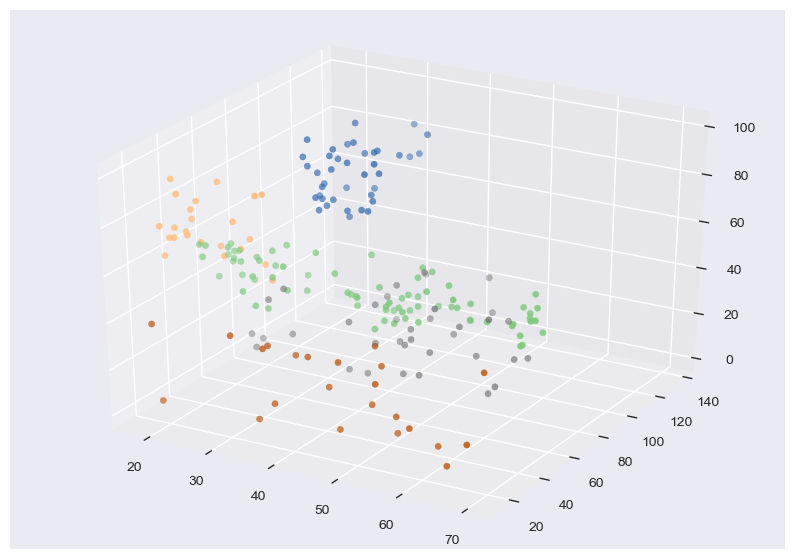

In [11]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection="3d")
ax.scatter3D(df_mall['Age'], df_mall['Annual Income (k$)'], df_mall['Spending Score (1-100)'], c=preds, cmap='Accent')
plt.show()

## Conclusions of our data
We can see that there is  5 clusters in our data, so our clients are segmented in 5 kinds of differents customes:
* Cluster 0: adult persons with low incomes and low spending score
* Cluster 1: adult persons with average expenditure and spending score
* Cluster 2: adult persons with high incomes and low spending score
* Cluster 3: medium persons (not young, not adult) with high incomes and high spending score
* Cluster 4: young persons with low incomes and high spending score

Other cluster information
* inertia: the inertia tell us how much distance there are betwet the points of each cluster, this can give us a clue about how good our model is (a clue not a conclusion). bear in your main that with more clusters less inertia.
* This model is not bad, could be better if we use other algorithm.
## Conclusions of K-Means algorithm

### Pros
* Easy to understund 
* Fast and with good convergence
* Is the most knowledge cluster algorithm

### Cons

* All clusters are spherical because we use a distance methods to create the clusters
* We need to say to the cluster the number of cluster that we want. there are methods to infer the number of clusters but they are not at all good (we will talk about this methods in another notebook).
* The algorithm does not discard points, all points of the dataset belong to a cluster, even if they are extremely far away.

## Bonus Track
**MinibatchKMeans:** is the K-Means algorithm but for huge datasets, you can charge your dataset in batches and feed the MinibatchKMeans